<a href="https://colab.research.google.com/github/Vnadh/MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Room Temperature Dataset is generated with help of an IOT Device data
representing room air temperature values with respect time. In Time Series observations
are functions of time, each data corresponds to an instance of time, so there is a
relationship between different data points of the dataset. A special case of time series is
univariate time series where you have only one feature to deal with. The dataset consists
of the following features:
1) Hourly _Temp contains mean Supply Air Temperature value in degree centigrade per
hour,
2) Datetime shows date and Hour of data recording
This Dataset represents “Univariate time series” values of temperature, which is
specific to time series analysis
Do the following tasks on the dataset

1. Find out the principal components of the independent variable (10M)
2. Find the missing values, outliers in the dataset (5M)
3. Apply the normalization technique on the features (5M)
4. Plot the features based on different ranges (10M)

# Find out the principal components of the independent variable (10M):

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/MLTempDataset.csv")

# Select the independent variable (Hourly_Temp) for PCA
X = data["DAYTON_MW"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values.reshape(-1, 1))

# Perform PCA with one component (you can choose the number of components you want)
n_components = 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Principal components
principal_components = pca.components_

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# You can now analyze the principal components and explained variance ratios


# Find the missing values, outliers in the dataset (5M):

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values (e.g., impute with mean, median, or remove rows/columns)
data = data.fillna(method='ffill')  # Forward fill missing values


In [ ]:
from scipy import stats

# Calculate z-scores for Hourly_Temp
z_scores = stats.zscore(data["DAYTON_MW"])

# Identify outliers (threshold z-score can be adjusted)
outliers = data[abs(z_scores) > 3]

# Handle outliers (e.g., remove or replace with mean/median)
data = data[abs(z_scores) <= 3]  # Remove outliers


# Apply the normalization technique on the features (5M):

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the Hourly_Temp feature
data["DAYTON_MW"] = scaler.fit_transform(data["DAYTON_MW"].values.reshape(-1, 1))

# Now, the Hourly_Temp feature is normalized between 0 and 1


# Plot the features based on different ranges (10M):

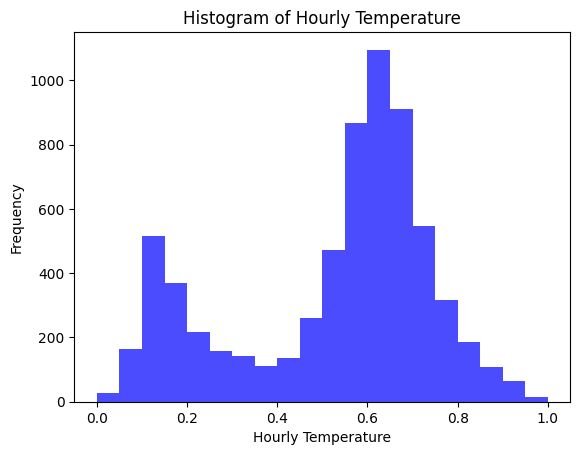

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of Hourly_Temp
plt.hist(data["DAYTON_MW"], bins=20, color='blue', alpha=0.7)
plt.xlabel("Hourly Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Hourly Temperature")
plt.show()


Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP:
Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T
wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05
mV), LVH: showing probable or definite left ventricular hypertrophy by Estes'
criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat,
Down: downsloping]
12.HeartDisease: output class [1: heart disease, 0: Normal]
HeartDisease is the target variable.
Do the following things:
1. Display the number of rows belong to heart disease and normal (5M)
2. Find out the null values and use the appropriate method to deal with such data
(5M)
3. The following features are Encoded: Sex, ChestPainType, RestingECG, ExerciseAngina,
ST_Slope. (5M)

Convert the data into numerical values using the right method
4. Use the kNN model for the features Sex, ChestPainType to predict the target variable for the
following data: (7.5M)

Age Se
x
Chest
PainTy
pe
Resti
ngBP
Chole
sterol
Fasti
ngBS
Restin
gECG
MaxH
R
Exerci
seAngi
na
Oldp
eak
ST_S
lope
HeartDi
sease

40 M ATA 140 289 0 Normal 172 N 0 Up 0
49 F NAP 160 180 0 Normal 156 N 1 Flat 1
37 M ATA 130 283 0 ST 98 N 0 Up 0
48 F ASY 138 214 0 Normal 108 Y 1.5 Flat 1
54 M NAP 150 195 0 Normal 122 N 0 Up 0
39 M NAP 120 339 0 Normal 170 N 0 Up 0
45 F ATA 130 237 0 Normal 170 N 0 Up 0
54 M ATA 110 208 0 Normal 142 N 0 Up 0
37 M ASY 140 207 0 Normal 130 Y 1.5 Flat 1

5. Repeat the above experiment using the features Oldpeak, ChestPainType, SEX and
find out the most effective features for predicting the heart failure. (7.5M)

# Display the number of rows belonging to heart disease and normal (5M):

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/heart.csv")

# Count the number of rows for each class
class_counts = data["HeartDisease"].value_counts()

# Display the counts
print(class_counts)


1    508
0    410
Name: HeartDisease, dtype: int64


#  Find out the null values and use the appropriate method to deal with such data (5M):

In [ ]:
# Check for null values in the dataset
null_counts = data.isnull().sum()

# Handle null values based on the feature type and your analysis goals
# Example for numerical feature (Replace with mean):
data["Age"].fillna(data["Age"].mean(), inplace=True)

# Example for categorical feature (Replace with mode):
data["ChestPainType"].fillna(data["ChestPainType"].mode()[0], inplace=True)


# Convert the following features into numerical values (5M):

In [ ]:
# Using label encoding for Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])
